# Two Node Scenarios

In [1]:
from pathlib import Path

import numpy as np

from idmlaser.models.numpynumba import NumbaSpatialSEIR
from idmlaser.numpynumba import DemographicsByYear
from idmlaser.utils import PropertySet

meta_params = PropertySet({
    "ticks": 365,
    "nodes": 1,
    "seed": 20240625,
    "output": Path.cwd() / "outputs",
})

model_params = PropertySet({
    "exp_mean": np.float32(7.0),
    "exp_std": np.float32(1.0),
    "inf_mean": np.float32(7.0),
    "inf_std": np.float32(1.0),
    "r_naught": np.float32(14.0),
    "seasonality_factor": np.float32(0.125),
    "seasonality_offset": np.float32(182),
})

params = PropertySet(meta_params, model_params)

model = NumbaSpatialSEIR(params)

# Ignore optional parameters: cbr, mortality, and immigration
demographics = DemographicsByYear(nyears=10, nnodes=2)
CAPACITY = 1_000_000
demographics.initialize(initial_population = np.array([CAPACITY, CAPACITY], dtype=np.uint32))

max_capacity = CAPACITY * 2
INFECTIONS = 10
initial = np.zeros((2, 4), dtype=np.uint32)
initial[0,:] = [100_000, 0, INFECTIONS, 899_990] # S, E, I, R
initial[1,:] = [CAPACITY, 0, 0, 0]  # all susceptible
network = np.array([[0, 0.05], [0.025, 0 ]], dtype=np.float32)  # 2x2 network
model.initialize(max_capacity, demographics, initial, network)

Model parameters: {'exp_mean': 7.0, 'exp_std': 1.0, 'inf_mean': 7.0, 'inf_std': 1.0, 'r_naught': 14.0, 'prng_seed': 20240412, 'ticks': 365, 'nodes': 1, 'seed': 20240625, 'output': PosixPath('/Users/christopherlorton/projects/laser/outputs'), 'seasonality_factor': 0.125, 'seasonality_offset': 182.0, 'beta': 2.0}
Seeding Numba random number generator with 10 threads
Threading layer chosen: workqueue
Initializing model with 2 nodes: (initial population: 2,000,000 maximum capacity: 2,000,000)


In [2]:
model.run(params.ticks)

  0%|          | 0/365 [00:00<?, ?it/s]

100%|██████████| 365/365 [00:02<00:00, 172.72it/s]

elapsed time: 0:00:02.133543


Let's plot the traces from node 0. Note that it trundles along with a low level of prevalence until exportation to node 1 causes an outbreak there which leads to importation back to node 0 and an outbreak.

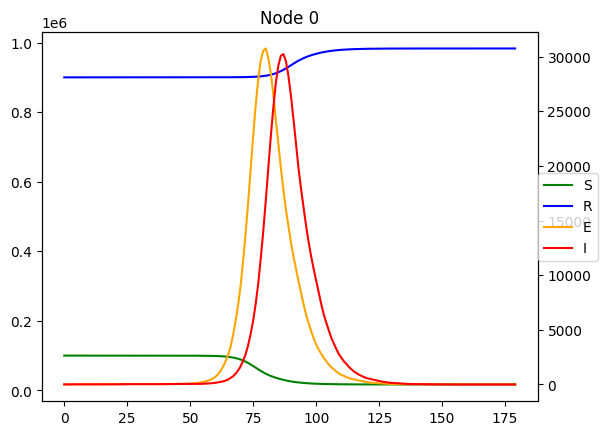

In [3]:
import matplotlib.pyplot as plt

S = model.report[:180, 0, 0]   # first 100 ticks, channel 0, node 0
E = model.report[:180, 1, 0]
I = model.report[:180, 2, 0]  # noqa: E741
R = model.report[:180, 3, 0]

fig, ax1 = plt.subplots()
plt.plot(S, label="S", color="green")
plt.plot(R, label="R", color="blue")
ax2 = ax1.twinx()
# ax2.set_yscale("log")
plt.plot(E, label="E", color="orange")
plt.plot(I, label="I", color="red")
plt.title("Node 0")
fig.legend(loc="center right")
plt.show()

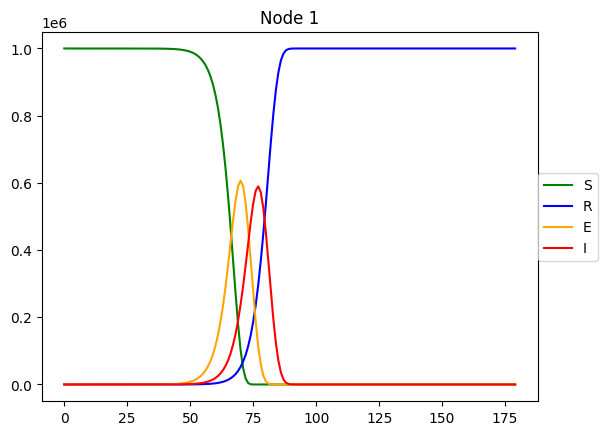

Bad pipe message: %s [b'`Xa\xa5\xa3G:\x83\x95].\xc8<\xb6\xb0\xdc\xc8\xe3\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x00']
Bad pipe message: %s [b'4\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00']
Bad pipe message: %s [b'\xc3Id\x84\x86&3\xb68\x98\xfbn\xe5\xd6v>\xc1\xe4\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00']
Bad pipe message: %s [b'\xae\xa8@\x80\xec1\xbd\xa8\xfbX\xd0\x82\xef\xfa\xff\xd6\xfb\xfd\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00', b'\x0f\

In [4]:
import matplotlib.pyplot as plt

S = model.report[:180, 0, 1]   # first 100 ticks, channel 0, node 0
E = model.report[:180, 1, 1]
I = model.report[:180, 2, 1]  # noqa: E741
R = model.report[:180, 3, 1]

fig, ax1 = plt.subplots()
plt.plot(S, label="S", color="green")
plt.plot(R, label="R", color="blue")
# ax2 = ax1.twinx()
# ax2.set_yscale("log")
plt.plot(E, label="E", color="orange")
plt.plot(I, label="I", color="red")
plt.title("Node 1")
fig.legend(loc="center right")
plt.show()